# INTRODUCTION

**Author**: Abdulla Shaikhutdinov\
**Title**: Sales Data Project\
**Date** : 28/04/2025


## Step 1: Question and Tasks
**Generaly**: Analyze the sales data to gain insight into orders and discover trends

**1.0 Tasks**
1) Sort countrys by sales and show it on pie
2) Find the unique orders in the topest country, and find the sum of the one unique order
   
**1.1 Deliverables**
   1) The largest sales are in the country: USA
   2) The number of unique orders in it: 112
   3) Average basket by one order: 32393.0$

## Step 2: Prepare

**2.0 Information about Data**
1) The data is available on Kaggle
2) Data collected includes (1)Sales, (2)Country, (3)Date, (4)Ordernumber and etc
3) The limitation of Data by date from 2003 to 2005

**2.1 Data Selection**\
The following file is selected and copied for analysis.
1) sales_data_sample.csv

## Step 3: Process
I will use Python for prepare and process data\

**3.1 Preparing the Library and Tools**\
The pandas, numpy, matplotlib packages installed and renamed to easy name

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

**3.2 Importing Data**\
Reading the selected data

In [78]:
path = 'sales_data_sample.csv' #Path for data
df = pd.read_csv(path,encoding = 'latin1')# for error 'utf-8' codec can't decode whe use enconding
df = df.rename(str.capitalize, axis = 'columns')# Capitalize the name of columns

**3.3 Data cleaning and manipulation**
1) Observe and familiarize with data
2) Check for null or missing values
3) Perform sanity check of data

In [80]:
#preview first 10 rows with all columns
df.head(10)

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Orderdate,Status,Qtr_id,Month_id,Year_id,...,Addressline1,Addressline2,City,State,Postalcode,Country,Territory,Contactlastname,Contactfirstname,Dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


Check the NaN values in data

In [82]:
#Find is there any NaN value
df.isna().sum()

Ordernumber            0
Quantityordered        0
Priceeach              0
Orderlinenumber        0
Sales                  0
Orderdate              0
Status                 0
Qtr_id                 0
Month_id               0
Year_id                0
Productline            0
Msrp                   0
Productcode            0
Customername           0
Phone                  0
Addressline1           0
Addressline2        2521
City                   0
State               1486
Postalcode            76
Country                0
Territory           1074
Contactlastname        0
Contactfirstname       0
Dealsize               0
dtype: int64

We change the NaN values by 'Other' value

In [84]:
df.fillna('Other', inplace= True) #Change the NaN values by 'Other' value
df.isna().sum() #Control the data

Ordernumber         0
Quantityordered     0
Priceeach           0
Orderlinenumber     0
Sales               0
Orderdate           0
Status              0
Qtr_id              0
Month_id            0
Year_id             0
Productline         0
Msrp                0
Productcode         0
Customername        0
Phone               0
Addressline1        0
Addressline2        0
City                0
State               0
Postalcode          0
Country             0
Territory           0
Contactlastname     0
Contactfirstname    0
Dealsize            0
dtype: int64

Some basic information about data
1) shape of data (number of rows and columns)
2) name of columns
3) type of value

In [86]:
df.info() #some basic info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ordernumber       2823 non-null   int64  
 1   Quantityordered   2823 non-null   int64  
 2   Priceeach         2823 non-null   float64
 3   Orderlinenumber   2823 non-null   int64  
 4   Sales             2823 non-null   float64
 5   Orderdate         2823 non-null   object 
 6   Status            2823 non-null   object 
 7   Qtr_id            2823 non-null   int64  
 8   Month_id          2823 non-null   int64  
 9   Year_id           2823 non-null   int64  
 10  Productline       2823 non-null   object 
 11  Msrp              2823 non-null   int64  
 12  Productcode       2823 non-null   object 
 13  Customername      2823 non-null   object 
 14  Phone             2823 non-null   object 
 15  Addressline1      2823 non-null   object 
 16  Addressline2      2823 non-null   object 


From the above observation
1) There some NaN values, which we change with "Other" value
2) Data frame shape is (2823, 25) which mean 2823 rows and 25 columns
3) *Orderdate* is wrongly type classified as 'object' and should be converted to datatime64

**Duplicate Data**\
How we can see there no duplicate

In [144]:
df.duplicated().sum() #0 duplicate

0

In [88]:
df['Orderdate'] = pd.to_datetime(df['Orderdate'])
df.info() #check the type of 'Orderdate'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Ordernumber       2823 non-null   int64         
 1   Quantityordered   2823 non-null   int64         
 2   Priceeach         2823 non-null   float64       
 3   Orderlinenumber   2823 non-null   int64         
 4   Sales             2823 non-null   float64       
 5   Orderdate         2823 non-null   datetime64[ns]
 6   Status            2823 non-null   object        
 7   Qtr_id            2823 non-null   int64         
 8   Month_id          2823 non-null   int64         
 9   Year_id           2823 non-null   int64         
 10  Productline       2823 non-null   object        
 11  Msrp              2823 non-null   int64         
 12  Productcode       2823 non-null   object        
 13  Customername      2823 non-null   object        
 14  Phone             2823 n

### STEP 4: ANALYZE
The statistic of df for analysis:
1) mean (average)
2) std (standard deviation)
3) min and max
 
Sales by conutry\
Sum sales in top country by unique order numbers

In [90]:
df.describe()

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Orderdate,Qtr_id,Month_id,Year_id,Msrp
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


Statistical findings:
1) The average Sales basket is 3553
2) That 75% value of sales is under 4508

**4.1 Sum sales by countries**

In [93]:
total_sales_by_country = df.groupby(['Country']).agg({'Sales': 'sum'}).sort_values(by = ['Sales'], ascending= False)

In [94]:
total_sales_by_country.reset_index()

,Country,Sales
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46
5,Italy,374674.31
6,Finland,329581.91
7,Norway,307463.70
8,Singapore,288488.41
9,Denmark,245637.15


**4.1.1 Pie by countries**

<Axes: ylabel='Sales'>

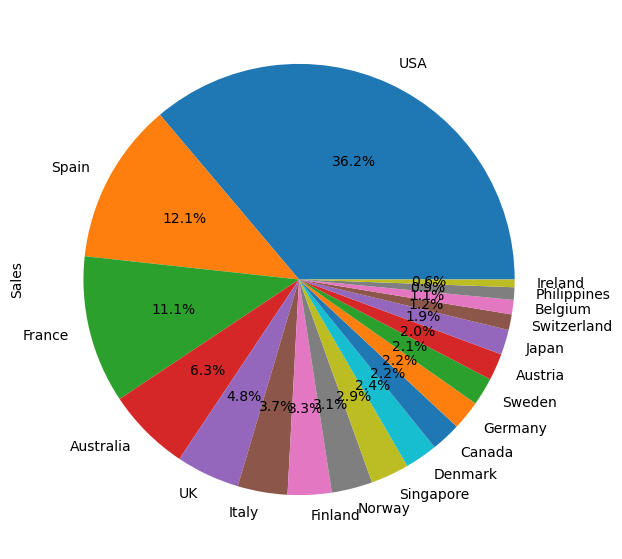

In [96]:
total_sales_by_country.plot.pie(y = 'Sales', figsize=(7, 7), legend = False, autopct = '%1.1f%%')

**4.2 Sum sales in top country (USA) by unique order numbers**

In [98]:
the_usa_sales = df[df['Country'] == 'USA']

In [99]:
unique_id = len(the_usa_sales['Ordernumber'].unique()) #We have 112 unique order numbers
print('The unique order id: ' + str(unique_id))

The unique order id: 112


**4.2.1 The sum sales in USA by ordernumber**

In [101]:
the_usa_sales.sort_values(by = ['Ordernumber']).groupby(['Ordernumber'], as_index = False).agg({'Sales': 'sum', 'Orderdate': 'max'})

,Ordernumber,Sales,Orderdate
0,10100,12133.25,2003-01-06
1,10102,6864.05,2003-01-10
2,10107,25783.76,2003-02-24
3,10109,27398.82,2003-03-10
4,10111,18695.58,2003-03-25
...,...,...,...
107,10407,57883.09,2005-04-22
108,10413,31648.47,2005-05-05
109,10414,48316.89,2005-05-06
110,10421,7261.75,2005-05-29


In [102]:
total_unique_order_sales = the_usa_sales.groupby('Ordernumber')['Sales'].sum()

**The average sales by one order**

In [104]:
avg_order_sales = total_unique_order_sales.mean()
print('The average sales by one order: ' + str(avg_order_sales.round()) + '$')

The average sales by one order: 32393.0$


In [105]:
the_usa_sales[the_usa_sales['Ordernumber'] == 10111] #Just small check

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Orderdate,Status,Qtr_id,Month_id,Year_id,...,Addressline1,Addressline2,City,State,Postalcode,Country,Territory,Contactlastname,Contactfirstname,Dealsize
476,10111,33,99.66,6,3288.78,2003-03-25,Shipped,1,3,2003,...,5557 North Pendale Street,Other,San Francisco,CA,Other,USA,Other,Murphy,Julie,Medium
502,10111,48,49.06,5,2354.88,2003-03-25,Shipped,1,3,2003,...,5557 North Pendale Street,Other,San Francisco,CA,Other,USA,Other,Murphy,Julie,Small
909,10111,28,64.33,2,1801.24,2003-03-25,Shipped,1,3,2003,...,5557 North Pendale Street,Other,San Francisco,CA,Other,USA,Other,Murphy,Julie,Small
962,10111,43,100.00,1,4818.15,2003-03-25,Shipped,1,3,2003,...,5557 North Pendale Street,Other,San Francisco,CA,Other,USA,Other,Murphy,Julie,Medium
1115,10111,39,100.00,4,4178.85,2003-03-25,Shipped,1,3,2003,...,5557 North Pendale Street,Other,San Francisco,CA,Other,USA,Other,Murphy,Julie,Medium
2073,10111,26,86.68,3,2253.68,2003-03-25,Shipped,1,3,2003,...,5557 North Pendale Street,Other,San Francisco,CA,Other,USA,Other,Murphy,Julie,Small


**The total sales by year in USA** 

In [107]:
yearly_sales = the_usa_sales.groupby('Year_id')['Sales'].sum().reset_index()
yearly_sales

,Year_id,Sales
0,2003,1305147.88
1,2004,1685470.69
2,2005,637364.26


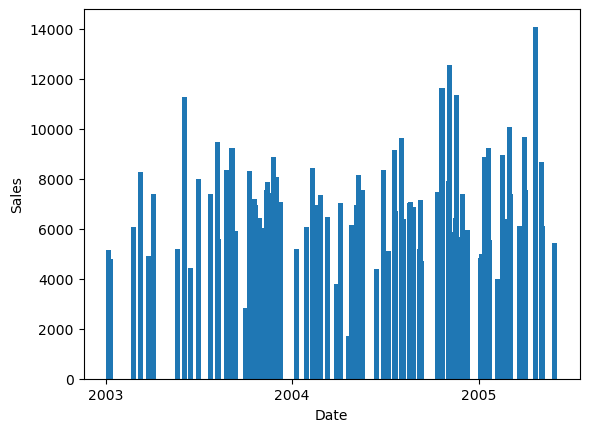

In [108]:
plt.bar(the_usa_sales['Orderdate'], the_usa_sales['Sales'],  width=10)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

### STEP 5: CONCLUSION
After a brief analysis of the sales dataset, we can conclude the following\
The largest sales are in the country: USA\
The number of unique orders in it: 112\
Average basket by one order in USA: 32393.0$